In [1]:
#mass is in units of 10e10 M_solar
#distances are in Kpc

#standard imports
import glob
from pygadgetreader import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#setting matplotlib parameters
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [2]:
#set matplotlib global font size
matplotlib.rcParams['font.size']=14

In [3]:
import re
def natural_key(string_):
    """See https://blog.codinghorror.com/sorting-for-humans-natural-sort-order/"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [4]:
#reading in the data
snap_folder = '/home/ryan/projects/Medvedev/snaps/snapdir_127/'

snap_low = '/home/ryan/projects/Medvedev/snaps/snapdir_127/snap_127.0.hdf5'

snaps = sorted(glob.glob(snap_folder + '*.hdf5'), key=natural_key)

snaps.remove(snap_low)

snap = snaps[0]
readheader(snap, 'header')

{'npartThisFile': array([92400,  2541, 90052,     0,    88,     0], dtype=int32),
 'npartTotal': array([2313825,  114400, 2190078,       0,    5147,      12], dtype=uint32),
 'npartTotalHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'ngas': 2313825,
 'ndm': 114400,
 'ndisk': 2190078,
 'nbulge': 0,
 'nstar': 5147,
 'nbndry': 12,
 'massTable': array([0.        , 0.00660847, 0.        , 0.        , 0.        ,
        0.        ]),
 'time': 0.9999999999999998,
 'nfiles': 25,
 'redshift': 2.220446049250313e-16,
 'boxsize': 100000.0,
 'O0': 0.301712,
 'Ol': 0.698288,
 'h': 0.6909,
 'flag_cooling': 1,
 'flag_sfr': 1,
 'flag_fb': 1,
 'flag_fh2': 0,
 'flag_age': 0,
 'flag_metals': 0,
 'flag_potential': 1,
 'flag_delaytime': 0,
 'flag_tmax': 0,
 'rhocrit': 8.966531696789415e-30}

Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass


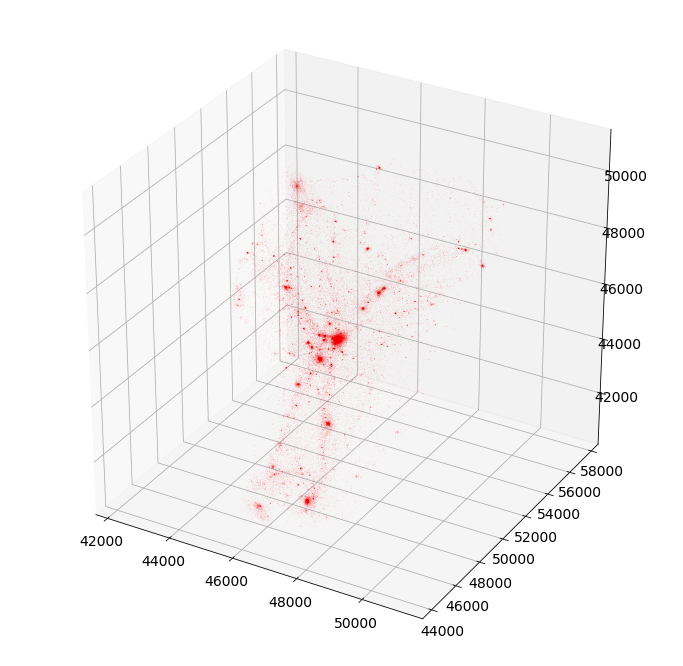

In [6]:
snap = snap_low

gas_pos = readsnap(snap, 'pos', 'gas')
gas_mass = readsnap(snap, 'mass', 'gas')

dm_pos = readsnap(snap, 'pos', 'dm')
dm_mass = readsnap(snap, 'mass', 'dm')

#extracting coordinates
gas_x = gas_pos[:, 0]
gas_y = gas_pos[:, 1]
gas_z = gas_pos[:, 2]

dm_x = dm_pos[:, 0]
dm_y = dm_pos[:, 1]
dm_z = dm_pos[:, 2]


fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.1)
#ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.1)

#ax.set_title('Looking at IC')
plt.show()

Opening /home/ryan/projects/Medvedev/snaps/snapdir_127/snap_127.1.hdf5
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Closing /home/ryan/projects/Medvedev/snaps/snapdir_127/snap_127.1.hdf5


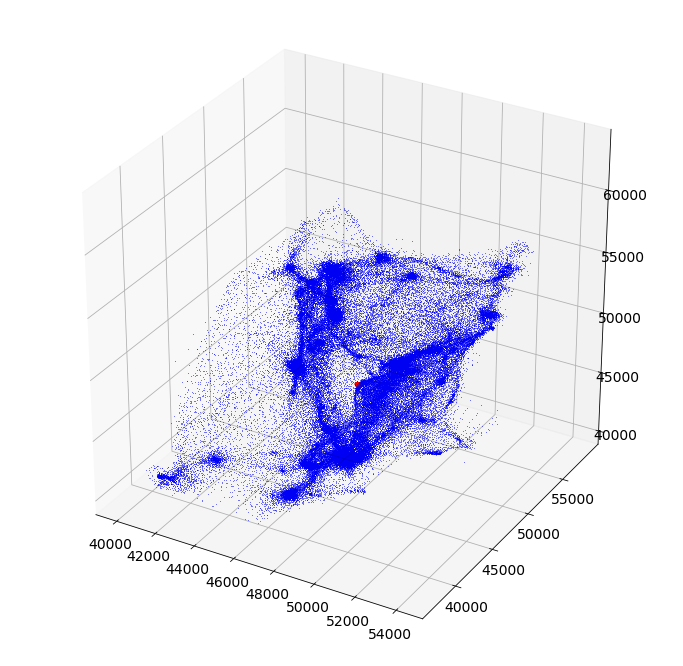

In [7]:
fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

#ax.set_title('Looking at IC')

for snap in snaps[:1]:
    
    print('Opening {}'.format(snap))
    
    gas_pos = readsnap(snap, 'pos', 'gas')
    gas_mass = readsnap(snap, 'mass', 'gas')

    dm_pos = readsnap(snap, 'pos', 'dm')
    dm_mass = readsnap(snap, 'mass', 'dm')

    #extracting coordinates
    gas_x = gas_pos[:, 0]
    gas_y = gas_pos[:, 1]
    gas_z = gas_pos[:, 2]

    dm_x = dm_pos[:, 0]
    dm_y = dm_pos[:, 1]
    dm_z = dm_pos[:, 2]

    ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.1)
    ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.1)
    
    print('Closing {}'.format(snap))
    
plt.show()